<h1 class="text-center">NeuroIA - Introduction to statistics for experimentation - 10/12/2020</h1>

<br>

<div class="jumbotron text-center"><b>The purpose of this tutorial is to learn how to infer statistically significant results from data.</b></div>

Import the following libraries and functions.

In [1]:
# This action is to be done once at the beginning of the tutorial
%matplotlib inline
import numpy as np
from numpy import genfromtxt
import scipy
from scipy.stats import binom, norm
import matplotlib
import matplotlib.pyplot as plt

<br>
<a id="1BIT"></a><h1>I. Overview </h1>

<div class="bg-danger" style="padding:1em"><b>Definition:</b> RR data (or Inter-Beat Intervals, IBI) is the duration between two pulsations in an electrocardiography.</div>



First, we wish to pre-process data from electrocardiography equipment.
Load the file "FarosRR.csv" which contains this physiological data.

In [2]:
# load heart rate data
rr_data = genfromtxt('FarosRR.csv', delimiter=',')
print(rr_data)

[[   648.76 -31874.  ]
 [   649.57 -31912.  ]
 [   650.35 -31894.  ]
 ...
 [  3952.1  -31656.  ]
 [  3953.1  -31723.  ]
 [  3954.1  -31840.  ]]


<p class="bg-primary" style="padding:1em">**QUESTION** The data recording is shifted by $-2^{15}$. Fill in the code below to get the correct values in milliseconds.</p>.

In [3]:
rr_data[:,1]+= 2**15
print(rr_data)

[[ 648.76  894.  ]
 [ 649.57  856.  ]
 [ 650.35  874.  ]
 ...
 [3952.1  1112.  ]
 [3953.1  1045.  ]
 [3954.1   928.  ]]


<p class="bg-primary" style="padding:1em"> Creation of qualitative variables. Load the file "rests.csv" which contains the times of the rest sessions.</p>

In [4]:
# load times of the rest sessions
rests_data = genfromtxt('rests.csv', delimiter=',')
print(rests_data)

[[ 678.65  738.66]
 [1506.3  1566.3 ]
 [2296.7  2356.7 ]
 [3094.7  3154.7 ]]


<p class="bg-primary" style="padding:1em"> Selects the RR data that correspond to the first rest session.</p>

In [5]:
isRest = np.array([rests_data[0,0]<rr_data[:,0],rests_data[0,1]>rr_data[:,0]])
isRest = isRest.all(axis=0)
rest_data = rr_data[isRest,1]
print(rest_data)

[ 808.  763.  703.  685.  750.  826. 1221. 1059.  882.  766.  742.  806.
  944. 1223. 1088.  940.  867.  825.  811.  754.  780.  885. 1040. 1187.
 1090.  959.  893.  803.  795.  802.  878. 1036. 1026.  909.  787.  817.
  818.  990. 1024.  924.  943.  955.  965.  875.  833.  853.  854.  855.
  826.  875.  889. 1030.  993.  948.  901.  880.  811.  840.  904.  941.
  894.  878.  967. 1028. 1038.  940.  935.]


<p class="bg-primary" style="padding:1em"> Selects RR data for an interval of 60 seconds after one minute of mission.</p>

In [6]:
isMission = np.array([rests_data[0,1]+60<rr_data[:,0],rests_data[0,1]+2*60>rr_data[:,0]])
isMission = isMission.all(axis=0)
mission_data = rr_data[isMission,1]
print(mission_data)

[750. 764. 805. 801. 821. 809. 734. 757. 710. 734. 777. 846. 940. 842.
 836. 807. 788. 841. 918. 834. 840. 796. 755. 770. 779. 828. 986. 938.
 814. 833. 814. 822. 835. 927. 852. 808. 848. 857. 795. 848. 852. 817.
 860. 941. 900. 823. 789. 779. 797. 886. 940. 883. 817. 795. 810. 914.
 900. 813. 843. 836. 826. 872. 855. 767. 779. 792. 840. 828. 889. 833.
 796. 825.]


<p class="bg-primary" style="padding:1em">**QUESTION** Compute the average of these values.</p>

In [7]:
mean_rest = # fill the code
mean_mission = # fill the code
print('mean of rest session = ' + str(mean_rest))
print('mean of mission session = ' + str(mean_mission))

SyntaxError: invalid syntax (<ipython-input-7-2f139879c128>, line 1)

<p class="bg-primary" style="padding:1em">**QUESTION** Compute the standard deviation these values.</p>

In [8]:
std_rest = # fill the code
std_mission = # fill the code
print('std of rest session = ' + str(std_rest))
print('std of mission session = ' + str(std_mission))

SyntaxError: invalid syntax (<ipython-input-8-c17b26fa579e>, line 1)

<p class="bg-primary" style="padding:1em"> Plot the boxplots of these samples.</p>

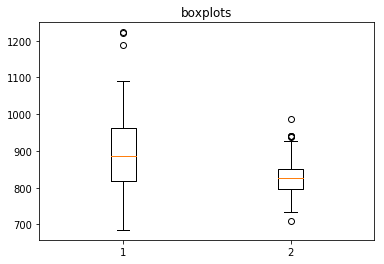

In [9]:
plt.boxplot([rest_data,mission_data]) 
plt.title("boxplots") 
plt.show()

<p class="bg-primary" style="padding:1em"> Plot the histograms of these samples.</p>

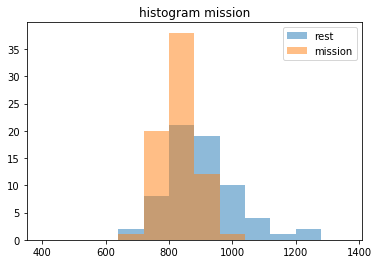

In [10]:
xmin = 400
xmax = 1400
size = 80
plt.hist(rest_data,bins=range(xmin,xmax,size),label='rest',alpha=0.5)
plt.hist(mission_data,bins=range(xmin,xmax,size),label='mission',alpha=0.5)
plt.legend(loc='upper right')
plt.title("histogram mission") 
plt.show()

<p class="bg-primary" style="padding:1em">**QUESTION** Plot the kernel density estimates of these samples using scipy.stats.gaussian_kde.</p>

In [11]:
density_rest = # fill the code
density_mission = # fill the code
x = range(xmin,xmax,1)
y_rest = density_rest(x)
y_mission = density_mission(x)
plt.plot(x, y_rest, 'k.', markersize=5,color='blue',label='rest')
plt.plot(x, y_mission, 'k.', markersize=5,color='red',label='mission')
plt.legend(loc='upper right')
plt.show()

SyntaxError: invalid syntax (<ipython-input-11-7efd7d908554>, line 1)

<p class="bg-primary" style="padding:1em">**QUESTION** Plot the kernel density estimates of normal data and the real density of a normal distribution.</p>

In [12]:
Xsize = 50
# normal data simulation
X = np.random.normal(size=Xsize)
# approximation computation
approx_density = #fill the code
# plot approx
x = np.linspace(-3,3,1000)
y = approx_density(x)
plt.plot(x, y, label='density approx.')
# plot real density
y_true = norm.pdf(x)
plt.plot(x, y_true, label='normal density')
# plot simulated data
plt.plot(X,len(X)*[0.0],'k.', markersize=5,color='red')
plt.legend(loc='upper right')
plt.show()

SyntaxError: invalid syntax (<ipython-input-12-a61bf4125067>, line 5)

<div class="bg-danger" style="padding:1em"> 
    Let $n_1$ (resp. $n_2$) be the size of rest_data (resp. mission_data).
</div> 
<div class="bg-danger" style="padding:1em"> 
    $\bullet \mu_{mission} = \frac{1}{n_1} \displaystyle \sum_{i=1}^{n_1} mission\_data(i)$,
</div>
<div class="bg-danger" style="padding:1em">
    $\bullet \displaystyle \mu_{rest} = \frac{1}{n_2}  \sum_{i=1}^{n_2} rest\_data(i)$
</div>
<div class="bg-danger" style="padding:1em">
    $\bullet \displaystyle \widehat{\sigma_M} = \sqrt{ \frac{(n_1-1)v_1 + (n_2-1)v_2}{n_1 + n_2 - 2} }$,
</div>
<div class="bg-danger" style="padding:1em">  
    with $\displaystyle v_1 = \frac{1}{n-1} \sum_{j=1}^n (mission\_data(i) - \mu_{mission})^2 $ 
    and $\displaystyle v_2 = \frac{1}{n-1} \sum_{j=1}^n (rest\_data(j) - \mu_{mission})^2 $.
</div>

<p class="bg-primary" style="padding:1em">The function $S = \dfrac{(\mu_{rest} - \mu_{mission})}{\widehat{\sigma_M} \sqrt{\frac{1}{n_1} + \frac{1}{n_2}} } \sim Student(n_1 + n_2 -2)$
  i.e. follows a Student law with parameter (degree of freedom) $n_1+n_2-2$. It allows to define the rejection region (in red) of the test $H_0:$ "means are equals" against $H_1:$ "means are different" with significance level $\alpha=0.05$.</p>

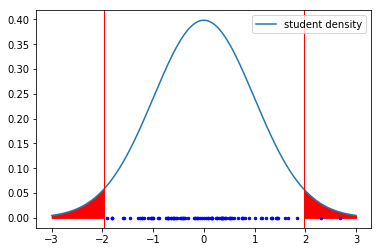

In [14]:
x = np.linspace(-3,3,1000)
n1 = len(rest_data)
n2 = len(mission_data)
# real density
y_true = scipy.stats.t.pdf(x,n1+n2-2)
# student data simulation
Xsize = 100
X = scipy.stats.t.rvs(n1+n2-2, size=Xsize)
# 2.5% left & right
x1 = scipy.stats.t.ppf(0.025,n1+n2-2)
x2 = scipy.stats.t.ppf(0.975,n1+n2-2)
## PLOT
# real density
plt.plot(x, y_true, label='student density')
# data 
plt.plot(X,len(X)*[0.0],'k.', markersize=5,color='blue')
# symetric 5% risk: only 5% of data is in the red area
plt.axvline(linewidth=1, color='r', x=x1)
plt.axvline(linewidth=1, color='r', x=x2)
xbeg = np.linspace(-3,x1,1000)
xend = np.linspace(x2,3,1000)
plt.fill_between(xbeg,scipy.stats.t.pdf(xbeg,n1+n2-2),color="r")
plt.fill_between(xend,scipy.stats.t.pdf(xend,n1+n2-2),color="r")
# legend & show
plt.legend(loc='upper right')
plt.show()

<p class="bg-primary" style="padding:1em">**QUESTION** Implement Student's t-test on means using scipy.stats.t.cdf .</p>

In [15]:
# STUDENT's TEST
alpha = 0.05 #Or whatever you want your alpha to be.
n1 = len(rest_data)
n2 = len(mission_data)
v1 = np.var(rest_data, ddof=1)
v2 = np.var(mission_data, ddof=1)
sigm = np.sqrt( ((n1-1)*v1 + (n2-1)*v2)/(n1+n2-2) )
denom = sigm * np.sqrt(1/n1 + 1/n2)
U = (np.mean(rest_data) - np.mean(mission_data))/denom
p_value = # fill code
print(p_value)
print('Value of the statistic = ' + str(U))
if (p_value < alpha):
    print('We can assume that means are different with risk '+ str(alpha))
else:
    print("We can't assume that means are different")
# scipy test
print(scipy.stats.ttest_ind(rest_data, mission_data,equal_var=True))
plt.plot(x, y_true, label='student density')
plt.plot(X,len(X)*[0.0],'k.', markersize=5,color='red')
plt.plot(U,0,'k.', markersize=10, color='green')
# plot
plt.legend(loc='upper right')
plt.show()

SyntaxError: invalid syntax (<ipython-input-15-262345d7e643>, line 7)

<p class="bg-primary" style="padding:1em"> Conclusion: We know how to preprocess and describe physiological data, as well as how to apply tests on data.</p>

<br>
<a id="1BIT"></a><h1>II. General Linear Model </h1>

<div class="bg-danger" style="padding:1em"><b> 1:</b> Generate two datasets distributed as the General Linear Model with the ANOVA configuration and with 3 conditions: the first one under $H_0$, the other one under $H_1$. </div>
<div class="bg-danger" style="padding:1em"><b> 2:</b> Compute the statistic in both cases.</div>
<div class="bg-danger" style="padding:1em"><b> 3:</b> Compute the p-values.</div>
<div class="bg-danger" style="padding:1em"><b> 4:</b> Compare the statistics and the p-values with the output of the scipy function for ANOVA.</div>
<div class="bg-danger" style="padding:1em"><b> *5*:</b> Same questions with the linear regression. </div>
<div class="bg-danger" style="padding:1em"><b> *6*:</b> Implement a permutation test on the two datasets of the first question. </div>

In [16]:
# number of samples
n=1200
# number of conditions
d=3
# number of sample per condition
ni = n/d
# dataset 1
Y1 =
# dataset 2
Y2 =


SyntaxError: invalid syntax (<ipython-input-16-228c3f307e25>, line 8)